In [10]:
%reload_ext jupyter-rdfify

In [16]:
%%rdf sparql --endpoint https://query.wikidata.org/sparql

# List all cars

SELECT ?carLabel
WHERE 
{
           # instance of   # motor car
    ?car wdt:P31         wd:Q1420;
        rdfs:label ?carLabel.
    FILTER(LANG(?carLabel) = "en").
    
}

carLabel
Pontiac Bonneville@en
back-up car@en
Audi e-tron@en
Mirage GR8@en
Achilles@en
decrepit car@en
Cadillac Orleans@en
Alvis Stalwart@en
Buick LaCrosse@en
Ferrari 312 S@en


SPARQL: 
The server responded with a format different from the requested format.

Either the server does not support the requested format or the query resulted in an incompatible type.

Requested: 'xml', Response: 'rdf+xml'
                        


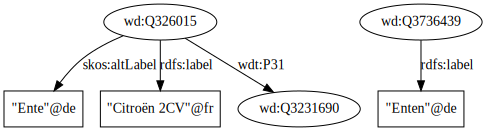

In [9]:
%%rdf sparql --endpoint https://query.wikidata.org/sparql --display graph

# Which car is called a “duck” in German ?

CONSTRUCT {
           # instance of   # automobile model
    ?model wdt:P31         wd:Q3231690;
        skos:altLabel ?modelAlias;
        rdfs:label ?modelLabel.
            
    # Duck
    wd:Q3736439 rdfs:label ?duckLabel.
}
WHERE 
{
           # instance of   # automobile model
    ?model wdt:P31         wd:Q3231690;
        skos:altLabel ?modelAlias;
        rdfs:label ?modelLabel;
    FILTER(LANG(?modelAlias) = "de").
    FILTER(LANG(?modelLabel) = "fr").
    FILTER(STRSTARTS(?duckLabel, ?modelAlias)).
            
    # Duck
    wd:Q3736439 rdfs:label ?duckLabel;
        FILTER(LANG(?duckLabel) = "de").
    
}